# **Methodology**

## **1. Data Preparation**

### **Problem Statement**

Menurut beberapa sumber terkenal, diperkirakan 10.000 transaksi terjadi melalui kartu kredit setiap detik di seluruh dunia. Karena frekuensi transaksi yang begitu tinggi, kartu kredit menjadi sasaran utama penipuan.

Setiap tahun, miliaran dolar hilang secara langsung karena penipuan kartu kredit. Kasus penipuan terjadi dalam kondisi yang berbeda, misalnya, transaksi di tempat penjualan (POS) atau transaksi yang dilakukan secara online atau melalui telepon, misalnya kasus kartu tidak ada (CNP) atau transaksi dengan kartu yang hilang dan dicuri. Dengan cara ini, penipuan kartu kredit pada tahun 2015 saja berjumlah 21,84 miliar dolar, dengan penerbit menanggung biaya 15,72 miliar dolar.

Banyak survei menunjukkan bahwa peningkatan ketergantungan pada kartu kredit untuk melakukan transaksi keuangan disertai dengan peningkatan tingkat penipuan.

Peningkatan penipuan kartu kredit baru-baru ini secara langsung memukul sektor keuangan dengan keras. Kerugian akibat penipuan kartu kredit terutama berdampak pada pedagang karena mereka menanggung semua biaya, termasuk biaya dari penerbit kartu mereka, biaya administrasi dan biaya lainnya. Semua kerugian ditanggung oleh pedagang, yang menyebabkan kenaikan harga barang dan penurunan diskon. Oleh karena itu, mengurangi kerugian ini sangat penting. Diperlukan sistem deteksi fraud yang efektif untuk meminimalisir jumlah kasus fraud.

### **Objectives**

- Analisa ini akan berfokus mendeteksi hal apa yang paling berpengaruh dalam pencurian kartu kredit ini sehingga perusahaan jasa keuangan (Perbankan) dapat melakukan evaluasi terhadap tindak kriminal ini.


## **Metrics**
- 0 = Non-Fraud (Negative)
- 1 = Fraud (Positive)

- Error tipe 1: False Positive
- False Positive akan memberikan prediksi jumlah tindakan kasus kriminal pencurian kartu kredit yang pada aktualnya tidak terjadi tindakan kriminal pencurian kartu kredit, dan hal ini memiliki pengaruh besar karena berdampak kepada citra perusahaan dan kerugian nasabah yang besar sehingga ini berdampak pada beban yang dikeluarkan perusahaan akan semakin besar.

- Error Tipe 2: False Negative
- False Negatif akan memberikan prediksi jumlah tindakan tidak kasus kriminal pencurian kartu kredit yang pada aktualnya terjadi pencurian kartu kredit, hal ini akan merugikan merugikan perusahaan dalam skala kecil jika dibiarkan.

### **Analytical Approach**

- Dalam analisa ini akan dilakukan 3 tahapan :
  - 1. Tahapan pertama akan melakukan Exploratory Data Analyst untuk mendapatkan insight secara deskriptive
  - 2. Tahapan kedua akan melakukan visualisasi dari hasil data yang sudah di analisa
  - 3. Tahapan ketiga akan melakukan modeling machine learning sehingga diperoleh faktor apa yang memiliki pengaruh penyebab terjadinya tindakan kriminal pencurian kartu kredit sehingga perusahaan dapat menargetkan berapa total nasabah yang akan dicegah dari tindakan kecurangan pencurian kartu kredit ini.

### **Definisi Kolom**

| **Nama Kolom** | **Keterangan Kolom** |
| --- | --- |
|**Credit Card Fraud**||
|Distance From Home| The distance from home where the transaction happened|
|Distance From Last Transaction| The distance from last transaction happened|
|Ratio To Median Purchase Price| Ratio of purchased price transaction to median purchase price|
|Repeat Retailer|  Is the transaction happened from same retailer|
|Used Chip |  Is the transaction through chip (credit card)|
|Used Pin Number| Is the transaction happened by using PIN number|
|Online Order | Is the transaction an online order|
|Fraud | Is the transaction fraudulent|

In [1]:
# Library
import pandas as pd # Pandas Library 
import numpy as np # Numpy Library

# Visualization
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Data Visualization

# Feature Engineering
from sklearn.pipeline import Pipeline # to Create a Pipeline for Feature Engineering
from sklearn.impute import SimpleImputer # For Missing Value Handling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder # to Handle Catogorical Features
from sklearn.compose import ColumnTransformer # to Transform Features
import category_encoders as ce # to encode category features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold, RandomizedSearchCV

# Model Selection
from sklearn.linear_model import LogisticRegression # Base Model for Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Base Model for Decision Tree 
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV , GridSearchCV# Finding Best Hyperparameter with GridsearchCV
from sklearn.metrics import classification_report, confusion_matrix # to Display Classification Report and Confusion Matrix
from sklearn.neighbors import KNeighborsClassifier # Base Model for KNN
from sklearn.ensemble import RandomForestClassifier # Ensemble method using Random Forest
from xgboost import XGBClassifier # Ensemble method using XGBoost
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score # Evaluation Metric

# Imbalance Dataset
from imblearn.pipeline import Pipeline # to Create Pipeline for Imbalance Handling
from imblearn.over_sampling import RandomOverSampler, SMOTE # Random Over Sample as Imblance Handling method
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, PowerTransformer, OneHotEncoder,MinMaxScaler

# Ignore Warning
import warnings 
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('card_transdata.csv')
pd.options.display.max_columns=100
pd.options.display.max_rows=1000000
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.shape

(1000000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
total = float(len(df))

### Data Imbalance

In [6]:
pd.crosstab(index=df['fraud'],columns=df['fraud'],normalize=True).round(2)

fraud,0.0,1.0
fraud,,
0.0,0.91,0.00
1.0,0.00,0.09


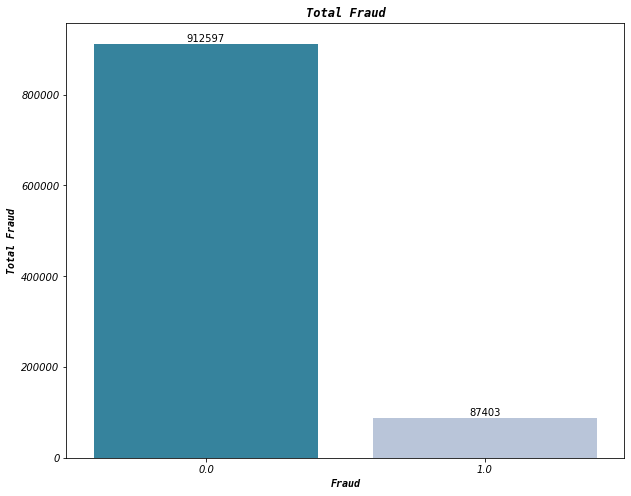

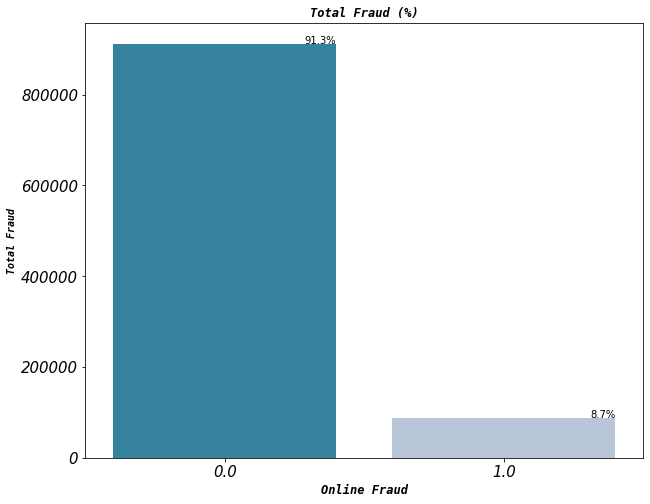

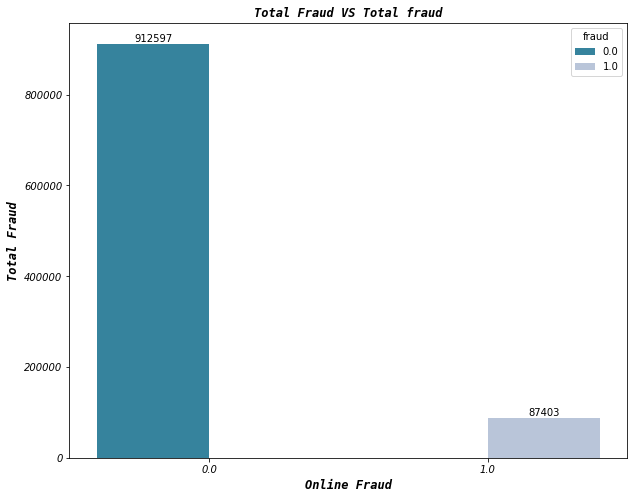

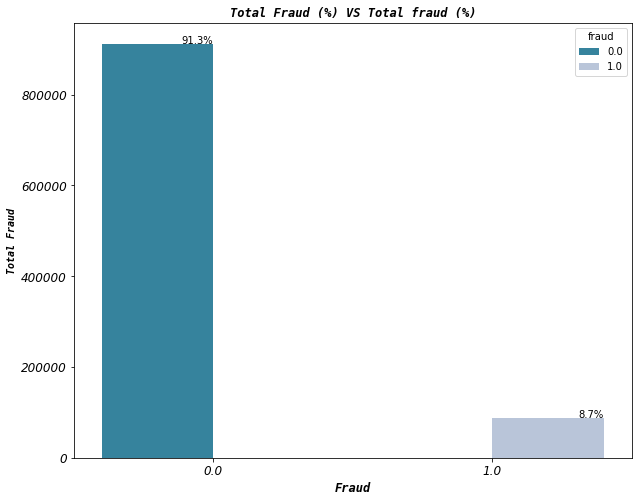

In [7]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='fraud', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Fraud',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Fraud', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Fraud', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="fraud",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=15,fontstyle='italic')
    plt.yticks(size=15,fontstyle='italic')
    plt.title('Total Fraud (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Online Fraud', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Fraud', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x='fraud', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Fraud VS Total fraud',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Online Fraud', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Fraud', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="fraud", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Fraud (%) VS Total fraud (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Fraud', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Fraud', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Total transaksi yang terjadi kecurangan di perusahaan sebanyak 8,7%, lebih rendah dari pada transaksi yang tidak terjadi kecurangan di perusahaan.

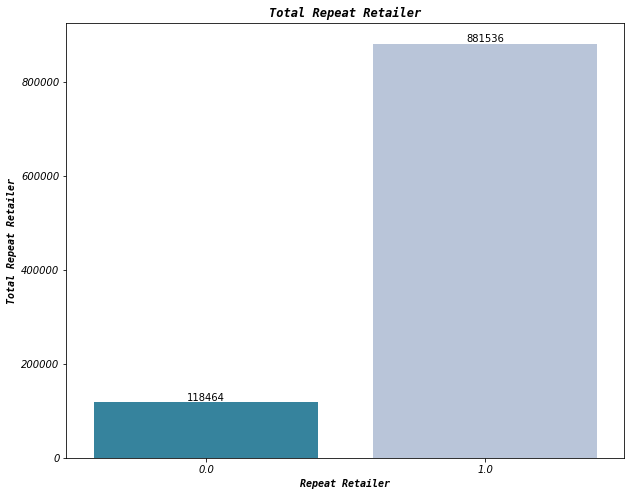

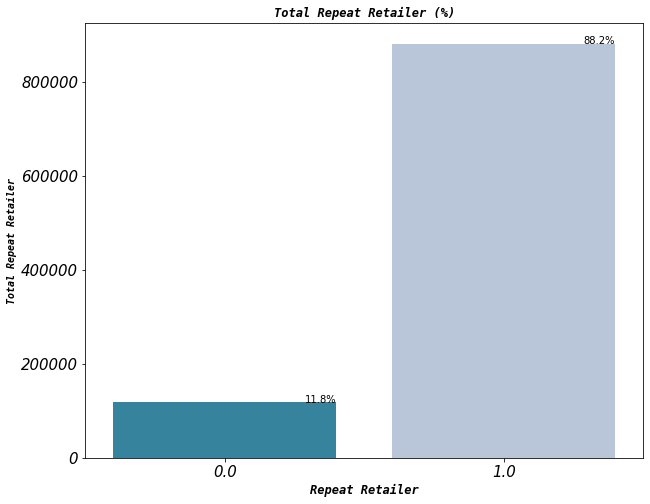

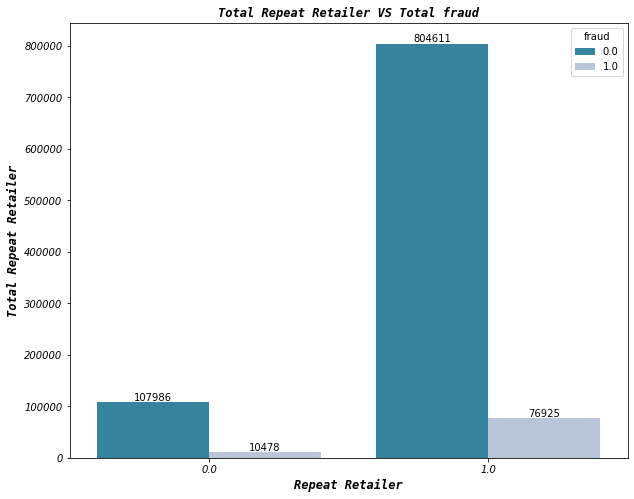

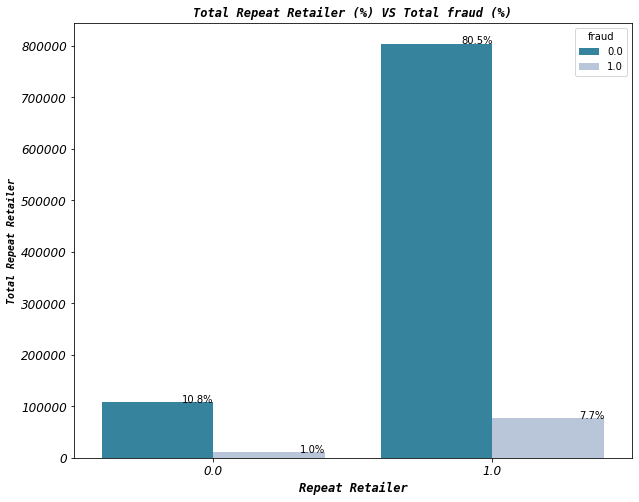

In [8]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='repeat_retailer', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Repeat Retailer',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Repeat Retailer', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Repeat Retailer', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="repeat_retailer",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=15,fontstyle='italic')
    plt.yticks(size=15,fontstyle='italic')
    plt.title('Total Repeat Retailer (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Repeat Retailer', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Repeat Retailer', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x='repeat_retailer', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Repeat Retailer VS Total fraud',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Repeat Retailer', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Repeat Retailer', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="repeat_retailer", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Repeat Retailer (%) VS Total fraud (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Repeat Retailer', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Repeat Retailer', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Transaksi kecurangan paling banyak terjadi pada transaksi dari pembelian pada toko yang sama sebanyak 76.925 transaksi kecurangan dengan total persentase 7.7%

In [9]:
pd.crosstab(index=df['used_chip'],columns=df['fraud'],normalize=True).round(2)

fraud,0.0,1.0
used_chip,,
0.0,0.58,0.06
1.0,0.33,0.02


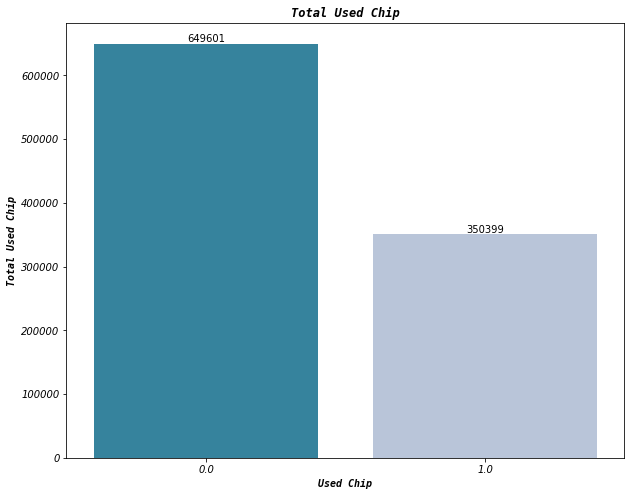

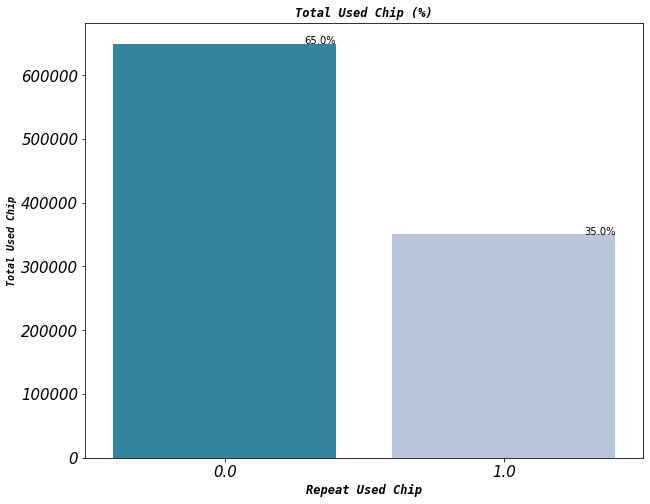

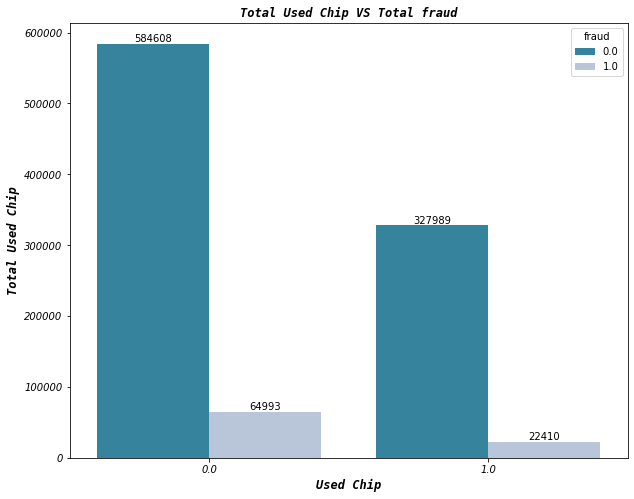

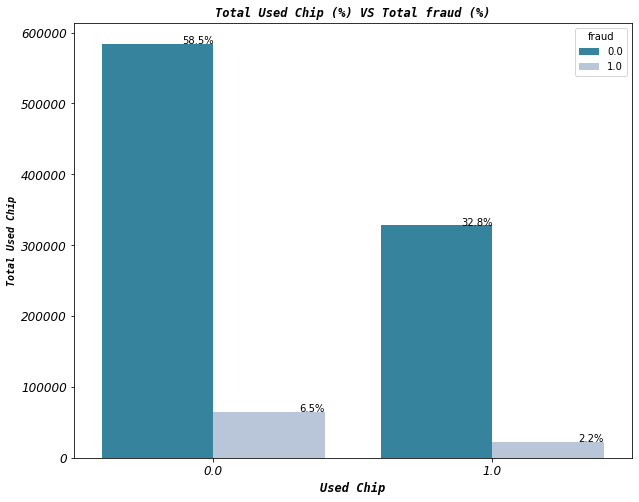

In [10]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='used_chip', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Used Chip',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Used Chip', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Used Chip', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="used_chip",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=15,fontstyle='italic')
    plt.yticks(size=15,fontstyle='italic')
    plt.title('Total Used Chip (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Repeat Used Chip', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Used Chip', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x='used_chip', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Used Chip VS Total fraud',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Used Chip', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Used Chip', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="used_chip", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Used Chip (%) VS Total fraud (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Used Chip', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Used Chip', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Total kartu kredit yang menggunakan chip sebanyak 35% dan yang tidak menggunakan chip sebanyak 65%, namun kecurangan paling banyak terjadi dari kartu kredit yang tidak menggunakan chip sebanyak 6.5% dari total keseluruhan kartu kredit yang tidak menggunakan chip, angka ini lebih tinggi dari pada kartu kredit yang menggunakan chip.

In [11]:
pd.crosstab(index=df['used_pin_number'],columns=df['fraud'],normalize=True).round(2)

fraud,0.0,1.0
used_pin_number,,
0.0,0.81,0.09
1.0,0.10,0.00


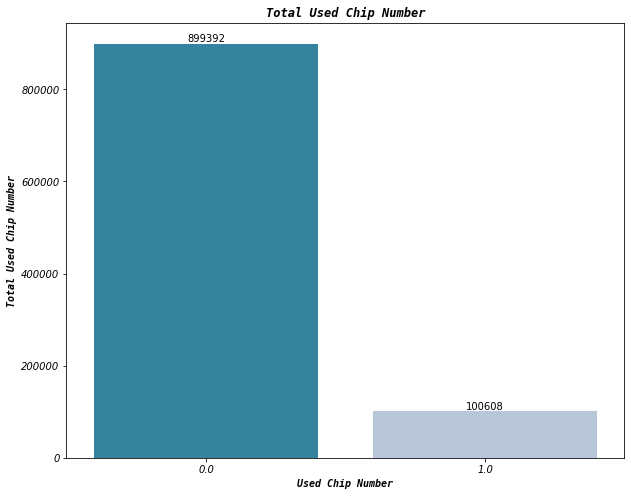

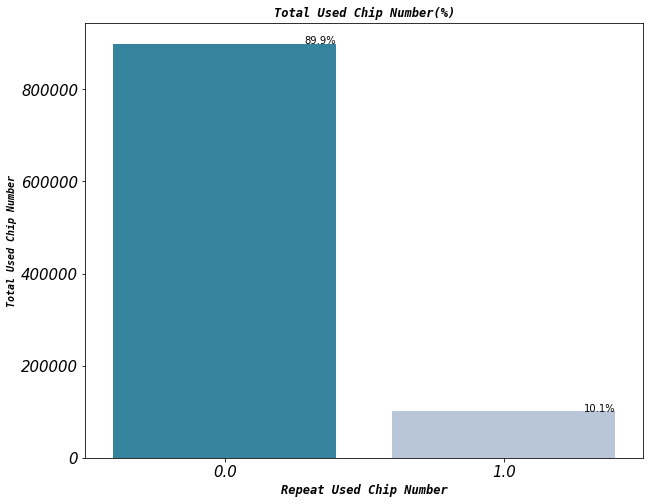

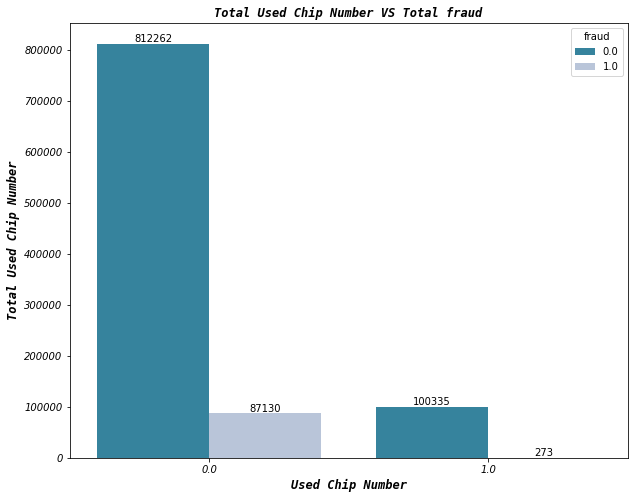

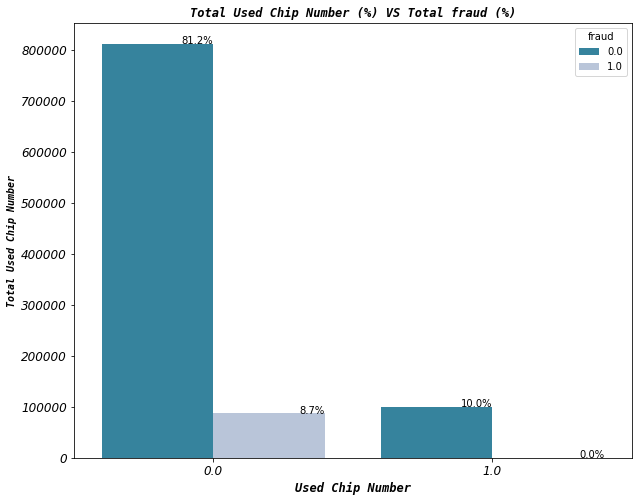

In [12]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='used_pin_number', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Used Chip Number',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Used Chip Number', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Used Chip Number', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="used_pin_number",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=15,fontstyle='italic')
    plt.yticks(size=15,fontstyle='italic')
    plt.title('Total Used Chip Number(%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Repeat Used Chip Number', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Used Chip Number', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x='used_pin_number', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Used Chip Number VS Total fraud',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Used Chip Number', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Used Chip Number', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="used_pin_number", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Used Chip Number (%) VS Total fraud (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Used Chip Number', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Used Chip Number', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Kartu kredit yang menggunakan nomor pada chip sebanyak 10.1%, lebih rendah dari pada kartu kredit yang tidak menggunakan nomor pada chip sebanyak 89%, namun kecurangan pada kartu kredit paling banyak terjadi pada kartu kredit yang tidak memiliki nomor pada chip yaitu sebanyak 8.7% dan hal ini lebih tinggi dari pada kartu kredit yang menggunakan chip yaitu 0.0%

In [13]:
pd.crosstab(index=df['online_order'],columns=df['fraud'],normalize=True).round(2)

fraud,0.0,1.0
online_order,,
0.0,0.34,0.00
1.0,0.57,0.08


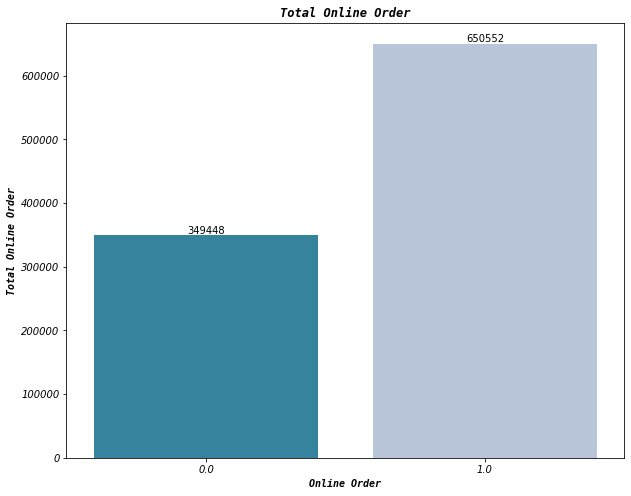

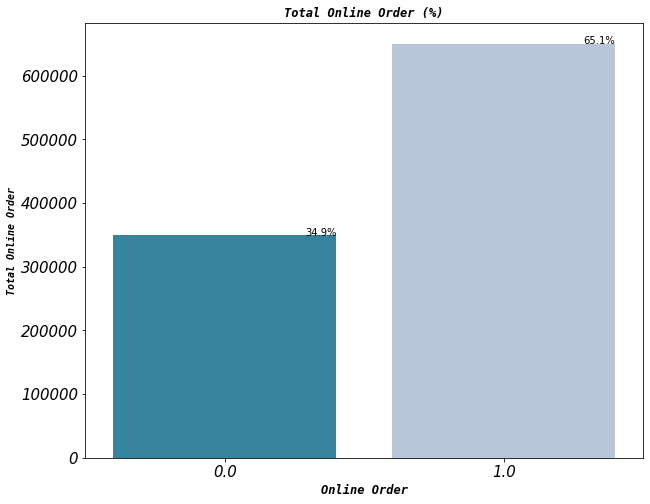

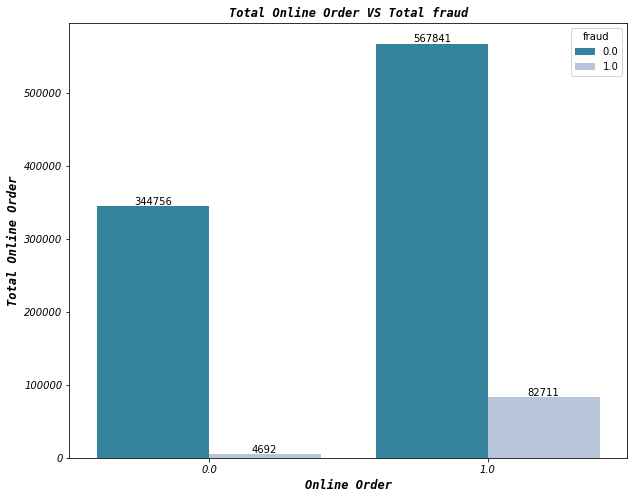

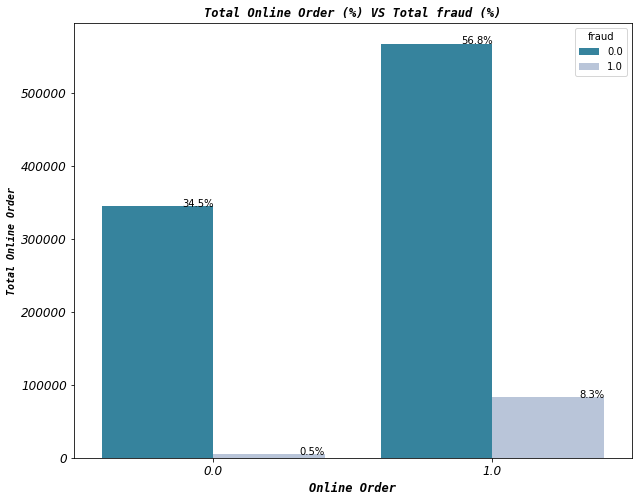

In [14]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='online_order', data=df, palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Online Order',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Online Order', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Online Order', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="online_order",data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=15,fontstyle='italic')
    plt.yticks(size=15,fontstyle='italic')
    plt.title('Total Online Order (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Online Order', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Online Order', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x='online_order', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Online Order VS Total fraud',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Online Order', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Online Order', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="online_order", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Online Order (%) VS Total fraud (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Online Order', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Online Order', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Pembelian secara online menggunakan kartu kredit lebih banyak 65% dari pada pembelian tidak online sebanyak 35%, namun kasus kecurangan kartu kredit paling banyak terjadi dari pembelian secara online yaitu 8.3%, pembelian secara online dengan kartu kredit memiliki proporsi lebih tinggi dari pada pembelian menggunakan kartu kredit untuk pembelian offline.

In [15]:
df.head(2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0


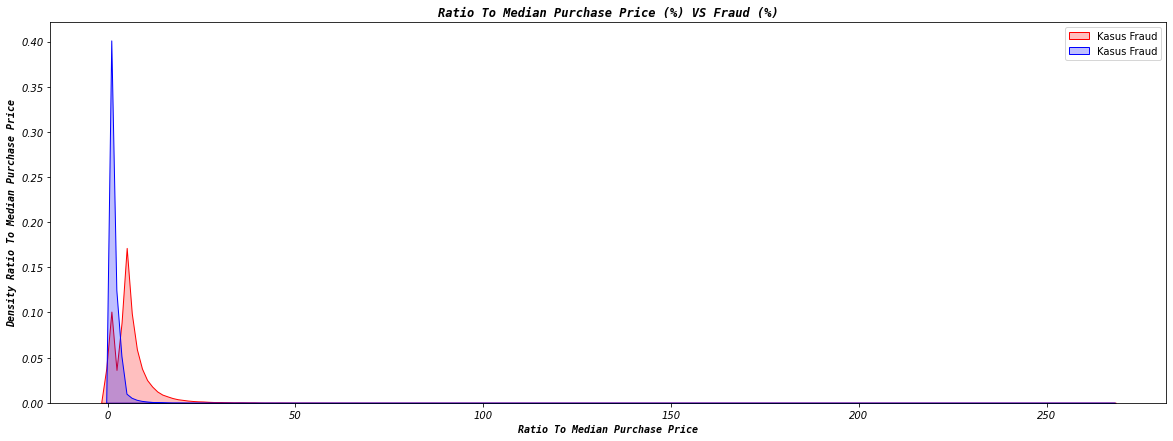

In [16]:
plt.figure(figsize=(20,7))
df_yes=df[df[ 'fraud']==1]['ratio_to_median_purchase_price'] 
df_no=df[df[ 'fraud']==0]['ratio_to_median_purchase_price'] 
sns.kdeplot(df_yes, label = 'Kasus Fraud', shade = True, color = 'r',fill=True)
sns.kdeplot(df_no, label = 'Kasus Fraud', shade = True, color = 'b', fill=True)
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Ratio To Median Purchase Price (%) VS Fraud (%)',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Ratio To Median Purchase Price', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Ratio To Median Purchase Price', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Kasus kecurangan paling banyak terjadi dari pembelian yang kurang dari 20 USD , sedangkan pembelian diatas 20 USD cenderung menurun kasus kecurangan dengan kartu kredit.

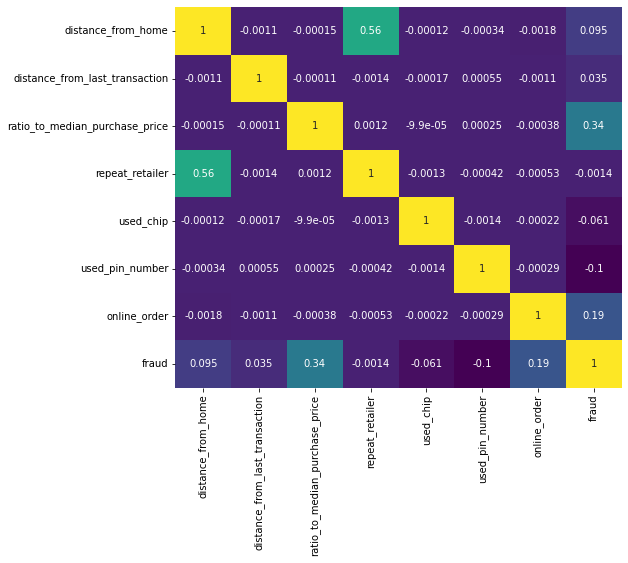

In [17]:
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr('spearman'), cmap='viridis', cbar=False, annot=True)
plt.show()

### **MACHINE LEARNING WITH**

#### **MACHINE LEARNING WITH OUTLIER**

##### **FEATURE ENGINEERING**

In [18]:
X = df.drop('fraud',axis=1)
y = df['fraud']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

- Penggunaan Feature Engineering untuk kolom `distance from home` **,** `distance from last transaction` **,** ` retio to median purchase price`, dalam feature engineering ini menggunakan scaling untuk mengecilkan angka standar deviasi agar tidak menyebabkan bias terlalu besar saat di machine learning.

In [20]:
num_columns = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']

num_pipeline = Pipeline([
    ('stdscler',StandardScaler())
])

preprocessor = ColumnTransformer([
    ('numeric', num_pipeline, num_columns)
])

#### **MODELING MACHINE LEARNING**

##### **BASE MODEL MACHINE LEARNING**

In [21]:
model_knn=KNeighborsClassifier()
model_dt=DecisionTreeClassifier()
model_rf=RandomForestClassifier()
model_xgb=XGBClassifier()

In [23]:
model_machine_learning = [model_knn,model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_train = []
score_recall_mean_ml_train = []
score_precision_mean_ml_train = []
score_f1_mean_ml_train = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=2)
    estimator = Pipeline([
        ('Processor',preprocessor),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_train = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='recall')
    model_crossval_precision_train = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='precision')
    model_crossval_f1_train =  cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_train.append(model_crossval_acc_train.mean())
    score_recall_mean_ml_train.append(model_crossval_recall_train.mean())
    score_precision_mean_ml_train.append(model_crossval_precision_train.mean())
    score_f1_mean_ml_train.append(model_crossval_f1_train.mean())
    
    print(model_crossval_acc_train, i)
    print(model_crossval_precision_train, i)
    print(model_crossval_recall_train, i)
    print(model_crossval_f1_train, i)

[0.9297625 0.9305925] KNeighborsClassifier()
[0.59474004 0.60046338] KNeighborsClassifier()
[0.61642974 0.6152856 ] KNeighborsClassifier()
[0.60539068 0.60778414] KNeighborsClassifier()
[0.926465 0.926825] DecisionTreeClassifier()
[0.57953316 0.58036278] DecisionTreeClassifier()
[0.58153371 0.57961729] DecisionTreeClassifier()
[0.58090246 0.58063315] DecisionTreeClassifier()
[0.9332775 0.9330575] RandomForestClassifier()
[0.61195936 0.61274185] RandomForestClassifier()
[0.64200109 0.63442121] RandomForestClassifier()
[0.62641825 0.62535938] RandomForestClassifier()
[0.9387825 0.9386   ] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
    

In [24]:
score_training = pd.DataFrame({ 'Model': ['Training Model KNN Regressor', 'Training Model DecisionTree Regressor', 'Training Model RandomForest Regressor', 'Training Model XGBoost Regressor'],
    'Score Accuracy': score_accuracy_mean_ml_train,
    'Score Precision': score_recall_mean_ml_train,
    'Score Recall': score_precision_mean_ml_train,
    'Score F1': score_f1_mean_ml_train })
print('Score Training :')
score_training

Score Training :


,Model,Score Accuracy,Score Precision,Score Recall,Score F1
0,Training Model KNN Regressor,0.930178,0.615858,0.597602,0.606587
1,Training Model DecisionTree Regressor,0.926645,0.580575,0.579948,0.580768
2,Training Model RandomForest Regressor,0.933167,0.638211,0.612351,0.625889
3,Training Model XGBoost Regressor,0.938691,0.736764,0.627048,0.677482


In [25]:
model_machine_learning = [model_knn,model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_test = []
score_recall_mean_ml_test = []
score_precision_mean_ml_test = []
score_f1_mean_ml_test = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=2)
    estimator = Pipeline([
        ('Processor',preprocessor),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_test = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='recall')
    model_crossval_precision_test = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='precision')
    model_crossval_f1_test =  cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_test.append(model_crossval_acc_test.mean())
    score_recall_mean_ml_test.append(model_crossval_recall_test.mean())
    score_precision_mean_ml_test.append(model_crossval_precision_test.mean())
    score_f1_mean_ml_test.append(model_crossval_f1_test.mean())
    
    print(model_crossval_acc_test, i)
    print(model_crossval_precision_test, i)
    print(model_crossval_recall_test, i)
    print(model_crossval_f1_test, i)

[0.92917 0.9294 ] KNeighborsClassifier()
[0.5939023  0.59261708] KNeighborsClassifier()
[0.59954233 0.61526141] KNeighborsClassifier()
[0.59670899 0.60372699] KNeighborsClassifier()
[0.92741 0.92589] DecisionTreeClassifier()
[0.58239614 0.57413426] DecisionTreeClassifier()
[0.57814645 0.5846013 ] DecisionTreeClassifier()
[0.58281187 0.57981381] DecisionTreeClassifier()
[0.93304 0.93288] RandomForestClassifier()
[0.61477046 0.60645933] RandomForestClassifier()
[0.63180778 0.63757007] RandomForestClassifier()
[0.62332394 0.62231903] RandomForestClassifier()
[0.93694 0.93597] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_

In [26]:
score_testing = pd.DataFrame({ 'Model': ['Testing Model KNN Regressor', 'Testing Model DecisionTree Regressor', 'Testing Model RandomForest Regressor', 'Testing Model XGBoost Regressor'],
    'Score Accuracy': score_accuracy_mean_ml_test,
    'Score Precision': score_recall_mean_ml_test,
    'Score Recall': score_precision_mean_ml_test,
    'Score F1': score_f1_mean_ml_test})
print('Score Training :')
score_testing

Score Training :


,Model,Score Accuracy,Score Precision,Score Recall,Score F1
0,Testing Model KNN Regressor,0.929285,0.607402,0.593260,0.600218
1,Testing Model DecisionTree Regressor,0.926650,0.581374,0.578265,0.581313
2,Testing Model RandomForest Regressor,0.932960,0.634689,0.610615,0.622821
3,Testing Model XGBoost Regressor,0.936455,0.697500,0.621768,0.657374


In [27]:
score_train_test_ol = pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Score F1 Train': score_f1_mean_ml_train,
    'Score F1 Test': score_f1_mean_ml_test})
print('Score Training VS Score Testing:')
score_train_test_ol

Score Training VS Score Testing:


,Model,Score F1 Train,Score F1 Test
0,Model KNN Regressor,0.606587,0.600218
1,Model DecisionTree Regressor,0.580768,0.581313
2,Model RandomForest Regressor,0.625889,0.622821
3,Model XGBoost Regressor,0.677482,0.657374


##### **MACHINE LEARNING WITHOUT OUTLIER**

In [28]:
df_2 = df.copy()

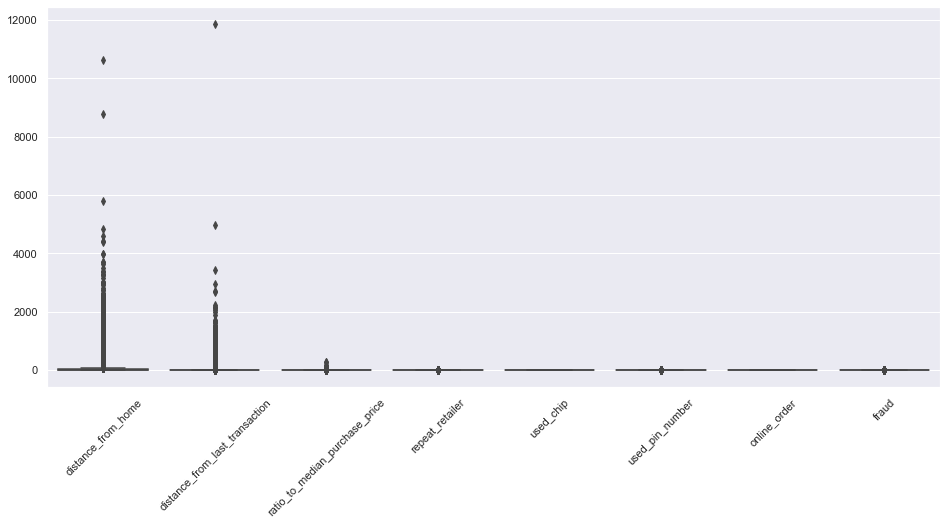

In [29]:
sns.set(style='darkgrid', palette='viridis')
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df_2)
plt.xticks(rotation=45)
plt.show()

In [30]:
# Membuat fungsi untuk mengecek outliers
def check_outliers(df,col):
    Q1=df[col].describe()['25%']
    Q3=df[col].describe()['75%']
    IQR=Q3-Q1
    Upper_fence=Q3+(1.5*IQR)
    Lower_fence=Q1-(1.5*IQR)
    df_outliers=df_2[(df_2[col]<Lower_fence) | (df_2[col]>Upper_fence)]
    if len(df_outliers)==0:
        return 'Tidak Ada Outliers'
    else:
        return df_outliers

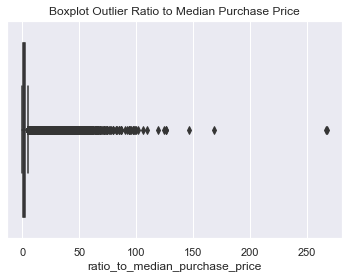

In [31]:
sns.boxplot(df_2['ratio_to_median_purchase_price'])
plt.title('Boxplot Outlier Ratio to Median Purchase Price')
plt.show()

In [32]:
outliers_ratio_to_median_purchase_price=check_outliers(df_2,'ratio_to_median_purchase_price')
outliers_ratio_to_median_purchase_price.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
47,2.530145,3.689781,8.297407,1.0,0.0,0.0,1.0,1.0
48,21.126116,0.271987,6.081771,1.0,0.0,0.0,1.0,1.0


In [33]:
print(f'Total outlier pada kolom ratio to median purchase price : {outliers_ratio_to_median_purchase_price.shape[0]}')
print(f'Total data awal: {df_2.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_ratio_to_median_purchase_price.shape[0]/df_2.shape[0])*100}')

Total outlier pada kolom ratio to median purchase price : 84386
Total data awal: 1000000
Persentase total outlier dari total data (%): 8.438600000000001


In [34]:
df_2.drop(outliers_ratio_to_median_purchase_price.index,inplace=True)

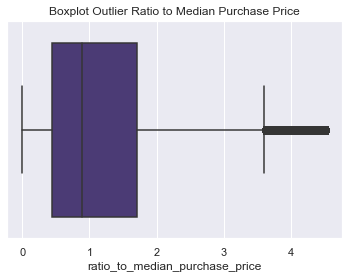

In [35]:
sns.boxplot(df_2['ratio_to_median_purchase_price'])
plt.title('Boxplot Outlier Ratio to Median Purchase Price')
plt.show()

In [36]:
X_2 = df_2.drop(columns='fraud')
y_2 = df_2['fraud']

In [37]:
X_train_OL, X_test_OL, y_train_OL, y_test_OL = train_test_split(X_2, y_2, stratify=y_2, test_size = .20, random_state=42)

In [38]:
model_knn_ol=KNeighborsClassifier()
model_dt_ol=DecisionTreeClassifier()
model_rf_ol=RandomForestClassifier()
model_xgb_ol=XGBClassifier()

In [39]:
model_machine_learning_2 = [model_knn_ol,model_dt_ol, model_rf_ol, model_xgb_ol]

score_accuracy_mean_ml_train_ol = []
score_recall_mean_ml_train_ol = []
score_precision_mean_ml_train_ol = []
score_f1_mean_ml_train_ol = []

for i in model_machine_learning_2:
    croval_classification_2 = StratifiedKFold(n_splits=2)
    estimator_2 = Pipeline([
        ('Processor',preprocessor),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train_ol = cross_val_score(estimator_2,X_train_OL,y_train_OL,cv=croval_classification_2,scoring='accuracy')
    model_crossval_recall_train_ol = cross_val_score(estimator_2,X_train_OL,y_train_OL,cv=croval_classification_2,scoring='recall')
    model_crossval_precision_train_ol = cross_val_score(estimator_2,X_train_OL,y_train_OL,cv=croval_classification_2,scoring='precision')
    model_crossval_f1_train_ol = cross_val_score(estimator_2,X_train_OL,y_train_OL,cv=croval_classification_2,scoring='f1')
    
    score_accuracy_mean_ml_train_ol.append(model_crossval_acc_train_ol.mean())
    score_recall_mean_ml_train_ol.append(model_crossval_recall_train_ol.mean())
    score_precision_mean_ml_train_ol.append(model_crossval_precision_train_ol.mean())
    score_f1_mean_ml_train_ol.append(model_crossval_f1_train_ol.mean())
    
    print(model_crossval_acc_train_ol, i)
    print(model_crossval_precision_train_ol, i)
    print(model_crossval_recall_train_ol, i)
    print(model_crossval_f1_train_ol, i)

[0.96308492 0.96296195] KNeighborsClassifier()
[0.50853384 0.50653622] KNeighborsClassifier()
[0.44502732 0.4489216 ] KNeighborsClassifier()
[0.47466584 0.47599181] KNeighborsClassifier()
[0.96102073 0.96114623] DecisionTreeClassifier()
[0.47687549 0.48335247] DecisionTreeClassifier()
[0.48539162 0.49118333] DecisionTreeClassifier()
[0.48197563 0.48900742] DecisionTreeClassifier()
[0.96522556 0.96509986] RandomForestClassifier()
[0.5434557  0.54355794] RandomForestClassifier()
[0.42535519 0.42349169] RandomForestClassifier()
[0.47326181 0.47927928] RandomForestClassifier()
[0.96757098 0.96749444] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=

In [40]:
score_training_non_ol = pd.DataFrame({ 'Model': ['Training Model KNN Regressor Non Outlier', 'Training Model DecisionTree Regressor Non Outlier', 'Training Model RandomForest Regressor Non Outlier', 'Training Model XGBoost Regressor Non Outlier'],
    'Score Accuracy Non Outlier': score_accuracy_mean_ml_train_ol,
    'Score Precision Non Outlier': score_recall_mean_ml_train_ol,
    'Score Recall Non Outlier': score_precision_mean_ml_train_ol,
    'Score F1 Non Outlier': score_f1_mean_ml_train_ol})
print('Score Training Non Outlier :')
score_training_non_ol

Score Training Non Outlier :


,Model,Score Accuracy Non Outlier,Score Precision Non Outlier,Score Recall Non Outlier,Score F1 Non Outlier
0,Training Model KNN Regressor Non Outlier,0.963023,0.446974,0.507535,0.475329
1,Training Model DecisionTree Regressor Non Outlier,0.961083,0.488287,0.480114,0.485492
2,Training Model RandomForest Regressor Non Outlier,0.965163,0.424423,0.543507,0.476271
3,Training Model XGBoost Regressor Non Outlier,0.967533,0.387738,0.604148,0.472266


In [41]:
model_machine_learning_2 = [model_knn_ol,model_dt_ol, model_rf_ol, model_xgb_ol]

score_accuracy_mean_ml_test_ol = []
score_recall_mean_ml_test_ol = []
score_precision_mean_ml_test_ol = []
score_f1_mean_ml_test_ol = []

for i in model_machine_learning_2:
    croval_classification_2 = StratifiedKFold(n_splits=2)
    estimator_2 = Pipeline([
        ('Processor',preprocessor),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test_ol = cross_val_score(estimator_2,X_test_OL,y_test_OL,cv=croval_classification_2,scoring='accuracy')
    model_crossval_recall_test_ol = cross_val_score(estimator_2,X_test_OL,y_test_OL,cv=croval_classification_2,scoring='recall')
    model_crossval_precision_test_ol = cross_val_score(estimator_2,X_test_OL,y_test_OL,cv=croval_classification_2,scoring='precision')
    model_crossval_f1_test_ol = cross_val_score(estimator_2,X_test_OL,y_test_OL,cv=croval_classification_2,scoring='f1')
    
    score_accuracy_mean_ml_test_ol.append(model_crossval_acc_test_ol.mean())
    score_recall_mean_ml_test_ol.append(model_crossval_recall_test_ol.mean())
    score_precision_mean_ml_test_ol.append(model_crossval_precision_test_ol.mean())
    score_f1_mean_ml_test_ol.append(model_crossval_f1_test_ol.mean())
    
    print(model_crossval_acc_test_ol, i)
    print(model_crossval_precision_test_ol, i)
    print(model_crossval_recall_test_ol, i)
    print(model_crossval_f1_test_ol, i)

[0.96342369 0.96365265] KNeighborsClassifier()
[0.51371237 0.51714952] KNeighborsClassifier()
[0.44768289 0.45263771] KNeighborsClassifier()
[0.47843015 0.4827479 ] KNeighborsClassifier()
[0.96116293 0.96174135] DecisionTreeClassifier()
[0.48063128 0.48224083] DecisionTreeClassifier()
[0.48732148 0.48382396] DecisionTreeClassifier()
[0.48248801 0.48504211] DecisionTreeClassifier()
[0.96519298 0.96511615] RandomForestClassifier()
[0.54425976 0.53848934] RandomForestClassifier()
[0.41678811 0.4293209 ] RandomForestClassifier()
[0.47041273 0.47498786] RandomForestClassifier()
[0.96488718 0.96534551] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=

In [42]:
score_testing_non_ol = pd.DataFrame({ 'Model': ['Testing Model KNN Regressor Non Outlier', 'Testing Model DecisionTree Regressor Non Outlier', 'Testing Model RandomForest Regressor Non Outlier', 'Testing Model XGBoost Regressor Non Outlier'],
    'Score Accuracy Non Outlier': score_accuracy_mean_ml_test_ol,
    'Score Precision Non Outlier': score_recall_mean_ml_test_ol,
    'Score Recall Non Outlier': score_precision_mean_ml_test_ol,
    'Score F1 Non Outlier': score_f1_mean_ml_test_ol})
print('Score Testing Non Outlier :')
score_testing_non_ol

Score Testing Non Outlier :


,Model,Score Accuracy Non Outlier,Score Precision Non Outlier,Score Recall Non Outlier,Score F1 Non Outlier
0,Testing Model KNN Regressor Non Outlier,0.963538,0.450160,0.515431,0.480589
1,Testing Model DecisionTree Regressor Non Outlier,0.961452,0.485573,0.481436,0.483765
2,Testing Model RandomForest Regressor Non Outlier,0.965155,0.423055,0.541375,0.472700
3,Testing Model XGBoost Regressor Non Outlier,0.965116,0.404547,0.546583,0.464657


In [43]:
score_train_test_ol_nol = pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Score F1 Train': score_f1_mean_ml_train,
    'Score F1 Test': score_f1_mean_ml_test,
    'Score F1 Train NoN Outlier': score_f1_mean_ml_train_ol,
    'Score F1 Test NoN Outlier': score_f1_mean_ml_test_ol,})
print('Score Training VS Score Testing:')
score_train_test_ol_nol

Score Training VS Score Testing:


,Model,Score F1 Train,Score F1 Test,Score F1 Train NoN Outlier,Score F1 Test NoN Outlier
0,Model KNN Regressor,0.606587,0.600218,0.475329,0.480589
1,Model DecisionTree Regressor,0.580768,0.581313,0.485492,0.483765
2,Model RandomForest Regressor,0.625889,0.622821,0.476271,0.472700
3,Model XGBoost Regressor,0.677482,0.657374,0.472266,0.464657


##### **MACHINE LEARNING WITH OVERSAMPLING T1**

In [44]:
model_machine_learning_3 = [model_knn_ol,model_dt_ol, model_rf_ol, model_xgb_ol]

score_accuracy_mean_ml_train_ol_os = []
score_recall_mean_ml_train_ol_os = []
score_precision_mean_ml_train_ol_os = []
score_f1_mean_ml_train_ol_os = []

for i in model_machine_learning_3:
    croval_classification_3 = StratifiedKFold(n_splits=2)
    estimator_3 = Pipeline([
        ('Processor',preprocessor),
        ('balancing',RandomOverSampler()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train_ol_os = cross_val_score(estimator_3,X_train_OL,y_train_OL,cv=croval_classification_3,scoring='accuracy')
    model_crossval_recall_train_ol_os = cross_val_score(estimator_3,X_train_OL,y_train_OL,cv=croval_classification_3,scoring='recall')
    model_crossval_precision_train_ol_os = cross_val_score(estimator_3,X_train_OL,y_train_OL,cv=croval_classification_3,scoring='precision')
    model_crossval_f1_train_ol_os = cross_val_score(estimator_3,X_train_OL,y_train_OL,cv=croval_classification_3,scoring='f1')
    
    score_accuracy_mean_ml_train_ol_os.append(model_crossval_acc_train_ol_os.mean())
    score_recall_mean_ml_train_ol_os.append(model_crossval_recall_train_ol_os.mean())
    score_precision_mean_ml_train_ol_os.append(model_crossval_precision_train_ol_os.mean())
    score_f1_mean_ml_train_ol_os.append(model_crossval_f1_train_ol_os.mean())
    
    print(model_crossval_acc_train_ol_os, i)
    print(model_crossval_precision_train_ol_os, i)
    print(model_crossval_recall_train_ol_os, i)
    print(model_crossval_f1_train_ol_os, i)

[0.95649645 0.95645538] KNeighborsClassifier()
[0.45581879 0.45530187] KNeighborsClassifier()
[0.8298725  0.82534247] KNeighborsClassifier()
[0.58843283 0.58686078] KNeighborsClassifier()
[0.96161596 0.96167866] DecisionTreeClassifier()
[0.49300131 0.48953289] DecisionTreeClassifier()
[0.46375228 0.46451472] DecisionTreeClassifier()
[0.47552029 0.47409627] DecisionTreeClassifier()
[0.96248969 0.96257423] RandomForestClassifier()
[0.49540299 0.49768505] RandomForestClassifier()
[0.60218579 0.60317692] RandomForestClassifier()
[0.54527546 0.54331671] RandomForestClassifier()
[0.95447595 0.95474341] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=

In [45]:
score_training_non_ol_os = pd.DataFrame({ 'Model': ['Training Model KNN Regressor Non Outlier OS', 'Training Model DecisionTree Regressor Non Outlier OS', 'Training Model RandomForest Regressor Non Outlier OS', 'Training Model XGBoost Regressor Non Outlier OS'],
    'Score Accuracy Non Outlier OS': score_accuracy_mean_ml_train_ol_os,
    'Score Precision Non Outlier OS': score_recall_mean_ml_train_ol_os,
    'Score Recall Non Outlier OS': score_precision_mean_ml_train_ol_os,
    'Score F1 Non Outlier OS': score_f1_mean_ml_train_ol_os})
print('Score Training Non Outlier OS:')
score_training_non_ol_os

Score Training Non Outlier OS:


,Model,Score Accuracy Non Outlier OS,Score Precision Non Outlier OS,Score Recall Non Outlier OS,Score F1 Non Outlier OS
0,Training Model KNN Regressor Non Outlier OS,0.956476,0.827607,0.455560,0.587647
1,Training Model DecisionTree Regressor Non Outl...,0.961647,0.464133,0.491267,0.474808
2,Training Model RandomForest Regressor Non Outl...,0.962532,0.602681,0.496544,0.544296
3,Training Model XGBoost Regressor Non Outlier OS,0.954610,0.989143,0.452136,0.620059


In [46]:
model_machine_learning_3 = [model_knn_ol,model_dt_ol, model_rf_ol, model_xgb_ol]

score_accuracy_mean_ml_test_ol_os = []
score_recall_mean_ml_test_ol_os = []
score_precision_mean_ml_test_ol_os = []
score_f1_mean_ml_test_ol_os = []

for i in model_machine_learning_3:
    croval_classification_3 = StratifiedKFold(n_splits=2)
    estimator_3 = Pipeline([
        ('Processor',preprocessor),
        ('balancing',RandomOverSampler()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test_ol_os = cross_val_score(estimator_3,X_test_OL,y_test_OL,cv=croval_classification_3,scoring='accuracy')
    model_crossval_recall_test_ol_os = cross_val_score(estimator_3,X_test_OL,y_test_OL,cv=croval_classification_3,scoring='recall')
    model_crossval_precision_test_ol_os = cross_val_score(estimator_3,X_test_OL,y_test_OL,cv=croval_classification_3,scoring='precision')
    model_crossval_f1_test_ol_os = cross_val_score(estimator_3,X_test_OL,y_test_OL,cv=croval_classification_3,scoring='f1')
    
    score_accuracy_mean_ml_test_ol_os.append(model_crossval_acc_test_ol_os.mean())
    score_recall_mean_ml_test_ol_os.append(model_crossval_recall_test_ol_os.mean())
    score_precision_mean_ml_test_ol_os.append(model_crossval_precision_test_ol_os.mean())
    score_f1_mean_ml_test_ol_os.append(model_crossval_f1_test_ol_os.mean())
    
    print(model_crossval_acc_test_ol_os, i)
    print(model_crossval_precision_test_ol_os, i)
    print(model_crossval_recall_test_ol_os, i)
    print(model_crossval_f1_test_ol_os, i)

[0.95596426 0.95659724] KNeighborsClassifier()
[0.45229401 0.45584648] KNeighborsClassifier()
[0.83037015 0.81696298] KNeighborsClassifier()
[0.58561151 0.58517745] KNeighborsClassifier()
[0.96158887 0.96210177] DecisionTreeClassifier()
[0.49140049 0.49176623] DecisionTreeClassifier()
[0.4622559  0.45875838] DecisionTreeClassifier()
[0.48079786 0.46132931] DecisionTreeClassifier()
[0.96240799 0.96262601] RandomForestClassifier()
[0.49383325 0.49880211] RandomForestClassifier()
[0.58729233 0.60448849] RandomForestClassifier()
[0.54066986 0.54841677] RandomForestClassifier()
[0.95539634 0.95560337] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=

In [47]:
score_testing_non_ol_os = pd.DataFrame({ 'Model': ['Testing Model KNN Regressor Non Outlier OS', 'Testing Model DecisionTree Regressor Non Outlier OS', 'Testing Model RandomForest Regressor Non Outlier OS', 'Testing Model XGBoost Regressor Non Outlier OS'],
    'Score Accuracy Non Outlier OS': score_accuracy_mean_ml_test_ol_os,
    'Score Precision Non Outlier OS': score_recall_mean_ml_test_ol_os,
    'Score Recall Non Outlier OS': score_precision_mean_ml_test_ol_os,
    'Score F1 Non Outlier OS': score_f1_mean_ml_test_ol_os})
print('Score Testing Non Outlier OS:')
score_testing_non_ol_os

Score Testing Non Outlier OS:


,Model,Score Accuracy Non Outlier OS,Score Precision Non Outlier OS,Score Recall Non Outlier OS,Score F1 Non Outlier OS
0,Testing Model KNN Regressor Non Outlier OS,0.956281,0.823667,0.454070,0.585394
1,Testing Model DecisionTree Regressor Non Outli...,0.961845,0.460507,0.491583,0.471064
2,Testing Model RandomForest Regressor Non Outli...,0.962517,0.595890,0.496318,0.544543
3,Testing Model XGBoost Regressor Non Outlier OS,0.955500,0.947683,0.455862,0.617626


##### **MACHINE LEARNING WITH SMOTE**

In [48]:
model_machine_learning_4 = [model_knn_ol,model_dt_ol, model_rf_ol, model_xgb_ol]

score_accuracy_mean_ml_train_ol_smote = []
score_recall_mean_ml_train_ol_smote = []
score_precision_mean_ml_train_ol_smote = []
score_f1_mean_ml_train_ol_smote = []

for i in model_machine_learning_4:
    croval_classification_4 = StratifiedKFold(n_splits=2)
    estimator_4 = Pipeline([
        ('Processor',preprocessor),
        ('balancing',SMOTE()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train_ol_smote = cross_val_score(estimator_4,X_train_OL,y_train_OL,cv=croval_classification_4,scoring='accuracy')
    model_crossval_recall_train_ol_smote = cross_val_score(estimator_4,X_train_OL,y_train_OL,cv=croval_classification_4,scoring='recall')
    model_crossval_precision_train_ol_smote = cross_val_score(estimator_4,X_train_OL,y_train_OL,cv=croval_classification_4,scoring='precision')
    model_crossval_f1_train_ol_smote = cross_val_score(estimator_4,X_train_OL,y_train_OL,cv=croval_classification_4,scoring='f1')
    
    score_accuracy_mean_ml_train_ol_smote.append(model_crossval_acc_train_ol_smote.mean())
    score_recall_mean_ml_train_ol_smote.append(model_crossval_recall_train_ol_smote.mean())
    score_precision_mean_ml_train_ol_smote.append(model_crossval_precision_train_ol_smote.mean())
    score_f1_mean_ml_train_ol_smote.append(model_crossval_f1_train_ol_smote.mean())
    
    print(model_crossval_acc_train_ol_smote, i)
    print(model_crossval_precision_train_ol_smote, i)
    print(model_crossval_recall_train_ol_smote, i)
    print(model_crossval_f1_train_ol_smote, i)

[0.95501111 0.95513386] KNeighborsClassifier()
[0.44932966 0.4502911 ] KNeighborsClassifier()
[0.89056466 0.88538327] KNeighborsClassifier()
[0.59751989 0.59801154] KNeighborsClassifier()
[0.95755039 0.95771683] DecisionTreeClassifier()
[0.46080176 0.46131467] DecisionTreeClassifier()
[0.79118397 0.79787234] DecisionTreeClassifier()
[0.58416319 0.58546473] DecisionTreeClassifier()
[0.95469985 0.95488539] RandomForestClassifier()
[0.45180621 0.45252095] RandomForestClassifier()
[0.97894353 0.97631886] RandomForestClassifier()
[0.61753061 0.61834231] RandomForestClassifier()
[0.95447868 0.95458778] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=

In [49]:
score_training_non_ol_smote = pd.DataFrame({ 'Model': ['Training Model KNN Regressor Non Outlier Smote', 'Training Model DecisionTree Regressor Non Outlier Smote', 'Training Model RandomForest Regressor Non Outlier Smote', 'Training Model XGBoost Regressor Non Outlier Smote'],
    'Score Accuracy Non Outlier Smote': score_accuracy_mean_ml_train_ol_smote,
    'Score Precision Non Outlier Smote': score_recall_mean_ml_train_ol_smote,
    'Score Recall Non Outlier Smote': score_precision_mean_ml_train_ol_smote,
    'Score F1 Non Outlier Smote': score_f1_mean_ml_train_ol_smote})
print('Score Training Non Outlier Smote:')
score_training_non_ol_smote

Score Training Non Outlier Smote:


,Model,Score Accuracy Non Outlier Smote,Score Precision Non Outlier Smote,Score Recall Non Outlier Smote,Score F1 Non Outlier Smote
0,Training Model KNN Regressor Non Outlier Smote,0.955072,0.887974,0.449810,0.597766
1,Training Model DecisionTree Regressor Non Outl...,0.957634,0.794528,0.461058,0.584814
2,Training Model RandomForest Regressor Non Outl...,0.954793,0.977631,0.452164,0.617936
3,Training Model XGBoost Regressor Non Outlier S...,0.954533,0.992750,0.451588,0.620474


In [50]:
model_machine_learning_4 = [model_knn_ol,model_dt_ol, model_rf_ol, model_xgb_ol]

score_accuracy_mean_ml_test_ol_smote = []
score_recall_mean_ml_test_ol_smote = []
score_precision_mean_ml_test_ol_smote = []
score_f1_mean_ml_test_ol_smote = []

for i in model_machine_learning_4:
    croval_classification_4 = StratifiedKFold(n_splits=2)
    estimator_4 = Pipeline([
        ('Processor',preprocessor),
        ('balancing',SMOTE()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test_ol_smote = cross_val_score(estimator_4,X_test_OL,y_test_OL,cv=croval_classification_4,scoring='accuracy')
    model_crossval_recall_test_ol_smote = cross_val_score(estimator_4,X_test_OL,y_test_OL,cv=croval_classification_4,scoring='recall')
    model_crossval_precision_test_ol_smote = cross_val_score(estimator_4,X_test_OL,y_test_OL,cv=croval_classification_4,scoring='precision')
    model_crossval_f1_test_ol_smote = cross_val_score(estimator_4,X_test_OL,y_test_OL,cv=croval_classification_4,scoring='f1')
    
    score_accuracy_mean_ml_test_ol_smote.append(model_crossval_acc_test_ol_smote.mean())
    score_recall_mean_ml_test_ol_smote.append(model_crossval_recall_test_ol_smote.mean())
    score_precision_mean_ml_test_ol_smote.append(model_crossval_precision_test_ol_smote.mean())
    score_f1_mean_ml_test_ol_smote.append(model_crossval_f1_test_ol_smote.mean())
    
    print(model_crossval_acc_test_ol_smote, i)
    print(model_crossval_precision_test_ol_smote, i)
    print(model_crossval_recall_test_ol_smote, i)
    print(model_crossval_f1_test_ol_smote, i)

[0.95473013 0.95471871] KNeighborsClassifier()
[0.44605687 0.44845514] KNeighborsClassifier()
[0.8901195  0.87496357] KNeighborsClassifier()
[0.59502196 0.59294998] KNeighborsClassifier()
[0.95788646 0.95794061] DecisionTreeClassifier()
[0.46681842 0.46007339] DecisionTreeClassifier()
[0.76770621 0.76479161] DecisionTreeClassifier()
[0.57555049 0.57597212] DecisionTreeClassifier()
[0.95546187 0.95519927] RandomForestClassifier()
[0.4544575  0.45359386] RandomForestClassifier()
[0.95540659 0.95511513] RandomForestClassifier()
[0.61747864 0.61510994] RandomForestClassifier()
[0.95507962 0.95502452] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=

##### PERBANDINGAN MODELING MACHINE LEARNING

In [51]:
score_train_test_ol_nol_os_smote = pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Score F1 Train': score_f1_mean_ml_train,
    'Score F1 Test': score_f1_mean_ml_test,
    'Score F1 Train NoN Outlier': score_f1_mean_ml_train_ol,
    'Score F1 Test NoN Outlier': score_f1_mean_ml_test_ol,
    'Score F1 Train Non Outlier OS': score_f1_mean_ml_train_ol_os,
    'Score F1 Test Non Outlier OS': score_f1_mean_ml_test_ol_os,
    'Score F1 Train Non Outlier Smote':score_f1_mean_ml_train_ol_smote,
    'Score F1 Test Non OUtlier Smote': score_f1_mean_ml_test_ol_smote})
print('Score Training VS Score Testing:')
score_train_test_ol_nol_os_smote

Score Training VS Score Testing:


,Model,Score F1 Train,Score F1 Test,Score F1 Train NoN Outlier,Score F1 Test NoN Outlier,Score F1 Train Non Outlier OS,Score F1 Test Non Outlier OS,Score F1 Train Non Outlier Smote,Score F1 Test Non OUtlier Smote
0,Model KNN Regressor,0.606587,0.600218,0.475329,0.480589,0.587647,0.585394,0.597766,0.593986
1,Model DecisionTree Regressor,0.580768,0.581313,0.485492,0.483765,0.474808,0.471064,0.584814,0.575761
2,Model RandomForest Regressor,0.625889,0.622821,0.476271,0.472700,0.544296,0.544543,0.617936,0.616294
3,Model XGBoost Regressor,0.677482,0.657374,0.472266,0.464657,0.620059,0.617626,0.620474,0.617762


In [52]:
score_test_ol_nol_os_smote = pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Score F1 Test': score_f1_mean_ml_test,
    'Score F1 Test NoN Outlier': score_f1_mean_ml_test_ol,
    'Score F1 Test Non Outlier OS': score_f1_mean_ml_test_ol_os,
    'Score F1 Test Non Outlier Smote': score_f1_mean_ml_test_ol_smote})
print('Score Testing:')
score_test_ol_nol_os_smote

Score Testing:


,Model,Score F1 Test,Score F1 Test NoN Outlier,Score F1 Test Non Outlier OS,Score F1 Test Non Outlier Smote
0,Model KNN Regressor,0.600218,0.480589,0.585394,0.593986
1,Model DecisionTree Regressor,0.581313,0.483765,0.471064,0.575761
2,Model RandomForest Regressor,0.622821,0.472700,0.544543,0.616294
3,Model XGBoost Regressor,0.657374,0.464657,0.617626,0.617762


Dari hasil melakukan modeling data, terdapat base model dari data ini ada pada `Model XGBoost Regressor` yang memiliki skore test F1 score tertinggi pada kolom `Score F1 Test Non Outlier Smote`

#### **HYPERPARAMETER TUNING XGBOOST**

In [82]:
max_depth = list(np.arange(1, 11))
learning_rate = list(np.arange(1, 100)/100)
n_estimators = list(np.arange(100, 201))
subsample = list(np.arange(2, 10)/10)
gamma = list(np.arange(1, 11)) 
colsample_bytree = list(np.arange(1, 10)/10)
reg_alpha = list(np.logspace(-3, 1, 10)) 

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [83]:
estimator_xgb = Pipeline([ 
        ('preprocess', preprocessor),
        ('balancing',SMOTE()), 
        ('model', model_xgb_ol)
        ])

skfold = StratifiedKFold(n_splits=5)

random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = skfold, 
    scoring = ['f1'], 
    n_jobs = -1,
    refit = 'f1')

In [84]:
random_xgb.fit(X_train_OL,y_train_OL)

In [ ]:
print(random_xgb.best_score_)
print(random_xgb.best_params_)

0.9999075
{'colsample_bytree': 0.3, 'gamma': 0.00398107, 'learning_rate': 1.0, 'max_depth': 1, 'n_estimators': 201, 'reg_alpha': 1, 'reg_lambda': 100, 'subsample': 0.3}
